In [472]:
import yfinance as yf
import pandas as pd
import os

In [474]:
bitcoin = yf.Ticker("BTC-USD")
bitcoin = bitcoin.history(period="max")
bitcoin.to_csv("bitcoin.csv")

In [482]:
bitcoin.index = pd.to_datetime(bitcoin.index).date

In [484]:
bitcoin = bitcoin.iloc[:-1].copy()

In [486]:
bitcoin

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-15,101373.531250,105047.539062,101227.031250,104298.695312,51145914137,0.0,0.0
2024-12-16,104293.578125,107780.578125,103322.984375,106029.718750,91020417816,0.0,0.0
2024-12-17,106030.687500,108268.445312,105291.734375,106140.601562,68589364868,0.0,0.0
2024-12-18,106147.296875,106470.609375,100041.539062,100041.539062,93865656139,0.0,0.0


<Axes: >

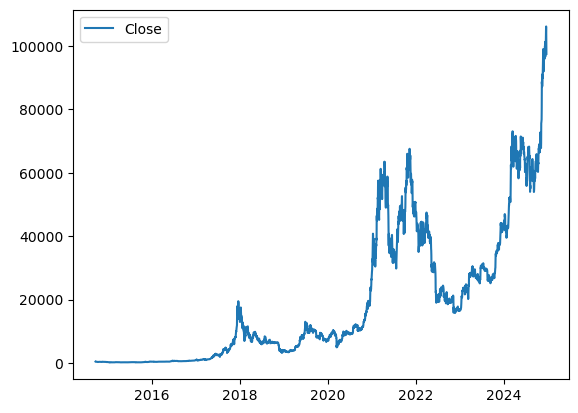

In [488]:
bitcoin.plot.line(y="Close", use_index=True)

In [490]:
del bitcoin["Dividends"]
del bitcoin["Stock Splits"]

In [468]:
bitcoin

,Open,High,Low,Close,Volume
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2024-12-16,104293.578125,107780.578125,103322.984375,106029.718750,91020417816
2024-12-17,106030.687500,108268.445312,105291.734375,106140.601562,68589364868
2024-12-18,106147.296875,106470.609375,100041.539062,100041.539062,93865656139
2024-12-19,100070.687500,102748.148438,95587.679688,97490.953125,97221662392


# Project Objective

The objective of this project is to predict the **direction** of Bitcoin price movement (whether it will rise or fall tomorrow) using a machine learning model, rather than predicting the exact price.  

As an investor, the focus is on determining whether the price will **rise tomorrow**, as this information is more useful for making buy or sell decisions. Knowing the precise price for tomorrow is not as critical.  

The model labels the direction of movement by comparing today's closing price with tomorrow's closing price:  
- **1** indicates the price will rise (upward movement).  
- **0** indicates the price will fall (downward movement).  

In [492]:
bitcoin["Tomorrow"] = bitcoin["Close"].shift(-1)

In [494]:
bitcoin["Target"] = (bitcoin["Tomorrow"] > bitcoin["Close"]).astype(int)

In [496]:
bitcoin

,Open,High,Low,Close,Volume,Tomorrow,Target
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,424.440002,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,394.795990,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,408.903992,1
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,398.821014,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,402.152008,1
...,...,...,...,...,...,...,...
2024-12-15,101373.531250,105047.539062,101227.031250,104298.695312,51145914137,106029.718750,1
2024-12-16,104293.578125,107780.578125,103322.984375,106029.718750,91020417816,106140.601562,1
2024-12-17,106030.687500,108268.445312,105291.734375,106140.601562,68589364868,100041.539062,0
2024-12-18,106147.296875,106470.609375,100041.539062,100041.539062,93865656139,97490.953125,0


# Why Random Forest?

Random Forest is chosen for this project because it is a robust and effective classification algorithm that aligns well with the objective of predicting Bitcoin's price direction (up or down). The key reasons are:

1. **Handling Nonlinear Relationships**:  
   Bitcoin price movements are influenced by complex and nonlinear factors. Random Forest can handle such relationships effectively by combining multiple decision trees.

2. **Feature Importance**:  
   Random Forest provides feature importance scores, allowing us to understand which predictors (e.g., Open, High, Low, Close, Volume) contribute most to the predictions.

3. **Robust to Overfitting**:  
   By averaging the predictions from many decision trees, Random Forest reduces the risk of overfitting, making it well-suited for financial time series data.

4. **Ease of Use**:  
   Random Forest requires minimal parameter tuning compared to other machine learning algorithms and performs well out-of-the-box.

Given the goal of predicting direction rather than exact prices, Random Forest's classification strength and flexibility make it a practical choice for this project.


In [498]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = bitcoin.iloc[:-100]
test = bitcoin.iloc[-100:]

predictors = ["Open", "High", "Low", "Close", "Volume"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [500]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [502]:
preds = pd.Series(preds, index=test.index)

In [504]:
preds

2024-09-11    1
2024-09-12    0
2024-09-13    0
2024-09-14    1
2024-09-15    1
             ..
2024-12-15    0
2024-12-16    0
2024-12-17    0
2024-12-18    0
2024-12-19    0
Length: 100, dtype: int64

In [506]:
precision_score(test["Target"], preds)

0.4375

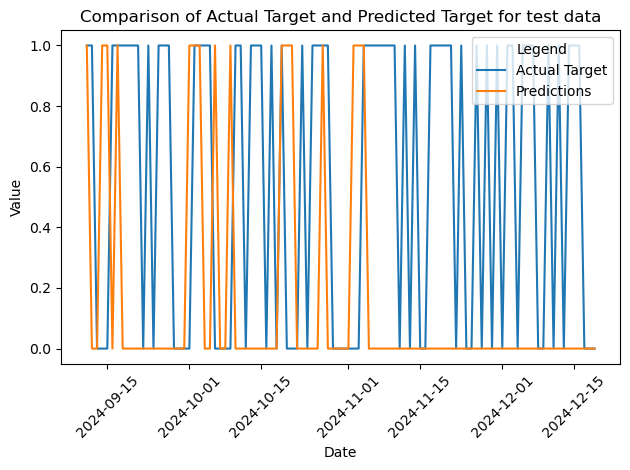

In [508]:
import matplotlib.pyplot as plt

combined = pd.concat([test["Target"], preds], axis=1)
combined.columns = ["Actual Target", "Predictions"]  

combined.plot(label=["Actual Target", "Predictions"])

plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Comparison of Actual Target and Predicted Target for test data")

plt.legend(title="Legend", loc="upper right") 
plt.tight_layout()
plt.show()

After using a Random Forest model for prediction, the precision score is only 44.44%, which means that if we expect the price to rise, there is only a 44.44% probability of it actually increasing. From the plot, we can observe that between November 1, 2024, and the present, the model predicts a downward trend, whereas many actual days show an upward movement. Therefore, it is necessary to optimize the model to improve its performance.

# Model Evaluation
The following code uses backtesting to evaluate a Random Forest model for predicting Bitcoin's daily movement. It splits the data into rolling windows, calculates precision, and checks the target distribution for better insights.

In [510]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [512]:
print(combined)

            Actual Target  Predictions
2024-09-11              1            1
2024-09-12              1            0
2024-09-13              0            0
2024-09-14              0            1
2024-09-15              0            1
...                   ...          ...
2024-12-15              1            0
2024-12-16              1            0
2024-12-17              0            0
2024-12-18              0            0
2024-12-19              0            0

[100 rows x 2 columns]


In [514]:
def backtest(data, model, predictors, start=1095, step=180):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [516]:
predictions = backtest(bitcoin, model, predictors)
predictions["Predictions"].value_counts()

Predictions
1    1453
0    1199
Name: count, dtype: int64

In [518]:
# Calculate the precision of the model's predictions compared to the actual target values.

precision_score(predictions["Target"], predictions["Predictions"])

0.516173434273916

In [520]:
# Calculate the proportion of each class in the 'Target' column.

predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.517345
0    0.482655
Name: count, dtype: float64

# Enhancing Predictive Features

The following code adds new predictive features to improve the model's accuracy in predicting Bitcoin price movements.

In [522]:
horizons = [3,10,20,60]
new_predictors = []

for horizon in horizons:
    rolling_averages = bitcoin.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    bitcoin[ratio_column] = bitcoin["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    bitcoin[trend_column] = bitcoin.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

In [524]:
bitcoin

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_3,Trend_3,Close_Ratio_10,Trend_10,Close_Ratio_20,Trend_20,Close_Ratio_60,Trend_60
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,424.440002,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,394.795990,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,408.903992,1,0.927789,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,398.821014,0,0.998837,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,402.152008,1,0.994962,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-15,101373.531250,105047.539062,101227.031250,104298.695312,51145914137,106029.718750,1,1.018771,2.0,1.039313,6.0,1.061264,11.0,1.223579,33.0
2024-12-16,104293.578125,107780.578125,103322.984375,106029.718750,91020417816,106140.601562,1,1.020493,2.0,1.050169,6.0,1.071224,12.0,1.234562,34.0
2024-12-17,106030.687500,108268.445312,105291.734375,106140.601562,68589364868,100041.539062,0,1.006171,3.0,1.044833,6.0,1.066859,12.0,1.226872,34.0
2024-12-18,106147.296875,106470.609375,100041.539062,100041.539062,93865656139,97490.953125,0,0.961285,2.0,0.985954,5.0,1.003342,12.0,1.149359,34.0


In [526]:
bitcoin = bitcoin.dropna(subset=bitcoin.columns[bitcoin.columns != "Tomorrow"])

In [528]:
bitcoin

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_3,Trend_3,Close_Ratio_10,Trend_10,Close_Ratio_20,Trend_20,Close_Ratio_60,Trend_60
2014-11-16,374.730011,390.799011,374.601990,387.881989,11905600,387.407990,0,1.001560,1.0,1.022918,6.0,1.082379,13.0,1.042590,29.0
2014-11-17,388.348999,410.199005,377.502014,387.407990,41518800,375.197998,0,1.009381,1.0,1.009688,6.0,1.076581,12.0,1.043046,29.0
2014-11-18,387.785004,392.402008,371.117004,375.197998,32222500,380.554993,1,0.978362,1.0,0.970352,5.0,1.036944,12.0,1.011062,29.0
2014-11-19,373.895996,386.480988,373.895996,380.554993,18931800,357.839996,0,0.998691,1.0,0.979825,5.0,1.046651,12.0,1.026805,29.0
2014-11-20,380.307007,382.024994,356.781006,357.839996,25233200,350.847992,0,0.964015,1.0,0.923500,4.0,0.981543,12.0,0.967298,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-15,101373.531250,105047.539062,101227.031250,104298.695312,51145914137,106029.718750,1,1.018771,2.0,1.039313,6.0,1.061264,11.0,1.223579,33.0
2024-12-16,104293.578125,107780.578125,103322.984375,106029.718750,91020417816,106140.601562,1,1.020493,2.0,1.050169,6.0,1.071224,12.0,1.234562,34.0
2024-12-17,106030.687500,108268.445312,105291.734375,106140.601562,68589364868,100041.539062,0,1.006171,3.0,1.044833,6.0,1.066859,12.0,1.226872,34.0
2024-12-18,106147.296875,106470.609375,100041.539062,100041.539062,93865656139,97490.953125,0,0.961285,2.0,0.985954,5.0,1.003342,12.0,1.149359,34.0


In [530]:
# Update model

model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [532]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [534]:
predictions = backtest(bitcoin, model, new_predictors)

In [535]:
predictions["Predictions"].value_counts()

Predictions
0.0    2064
1.0     528
Name: count, dtype: int64

In [540]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5643939393939394

In [542]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.515818
0    0.484182
Name: count, dtype: float64

In [544]:
predictions

,Target,Predictions
2017-11-15,1,0.0
2017-11-16,0,0.0
2017-11-17,1,0.0
2017-11-18,1,1.0
2017-11-19,1,1.0
...,...,...
2024-12-15,1,0.0
2024-12-16,1,0.0
2024-12-17,0,0.0
2024-12-18,0,0.0


# Conclusion

In this project, the primary focus is on the **precision score** as the key evaluation metric. The reason for emphasizing precision is that, as an investor, it is more critical to minimize false positives (incorrectly predicting a price rise). A higher precision score ensures that when the model predicts an upward trend, it is more likely to be correct, which directly helps in making better investment decisions.

### Initial Results
Using the base predictors (`Open`, `High`, `Low`, `Close`, and `Volume`), the initial **precision score** was relatively low, at **0.5161**. This indicated that the model was only slightly better than random guessing.

### Optimization Process
To improve the model's performance, I introduced additional factors:
- **Close Ratio**: The ratio of the current price to the rolling average price over different horizons (e.g., 3, 10, 20, 60 days).
- **Trend Features**: The cumulative trend (sum of Target values) over various past horizons, calculated to capture short- and long-term trends.

I experimented with different window sizes for the rolling averages and trends. After tuning the parameters and adjusting the model, the most effective horizons were **3, 10, 20, and 60 days**, which improved the feature quality.

### Final Results
After adding these factors and optimizing the **Random Forest Classifier**:
- The final **precision score** increased to **0.5644**.
- This represents an improvement of approximately **29.01%** over the initial precision score.

### Practical Insights
Although the precision score of **0.5644** might seem relatively low, it is quite reasonable in real-world financial markets. Achieving excessively high accuracy can often indicate **data leakage**, where the model inadvertently uses future data that would not be available in a live trading environment. 

In reality, no future data is available to guide decisions, so a model that performs slightly above random chance (50%) and captures realistic patterns already holds practical value. The goal is to build a robust model that can generalize well to unseen data, rather than overfitting historical data.

In financial markets like Bitcoin, which are highly volatile, even small predictive advantages can be leveraged to make profitable decisions over time.